In [0]:
### Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Label Encoding
from sklearn import preprocessing 

### Clustering
from sklearn.cluster import KMeans

In [2]:
cen = pd.read_csv('fulfilment_center_info.csv')
mel = pd.read_csv('meal_info.csv')
train = pd.read_csv('train.csv')

inner1 =  pd.merge(left=train ,right=cen, left_on='center_id', right_on='center_id')
mark0 = pd.merge(left=inner1 ,right=mel, left_on='meal_id', right_on='meal_id')
mark0.shape

(456548, 15)

# Clustering on Operational Area

In [0]:
fox = mark0[['op_area','center_id']].values

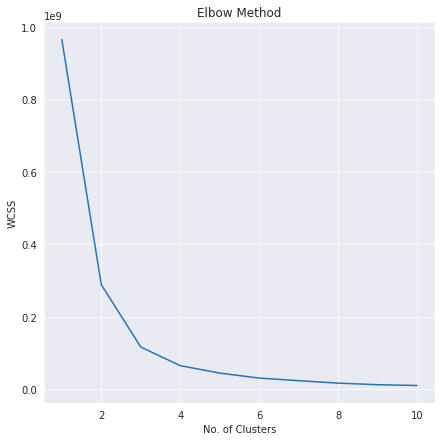

In [0]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=7)
  kmeans.fit(fox)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(fox)

In [0]:
mark0['Cluster'] = y_kmeans
mark0.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,Cluster
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,0
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,3


In [0]:
sns.set_style('darkgrid')

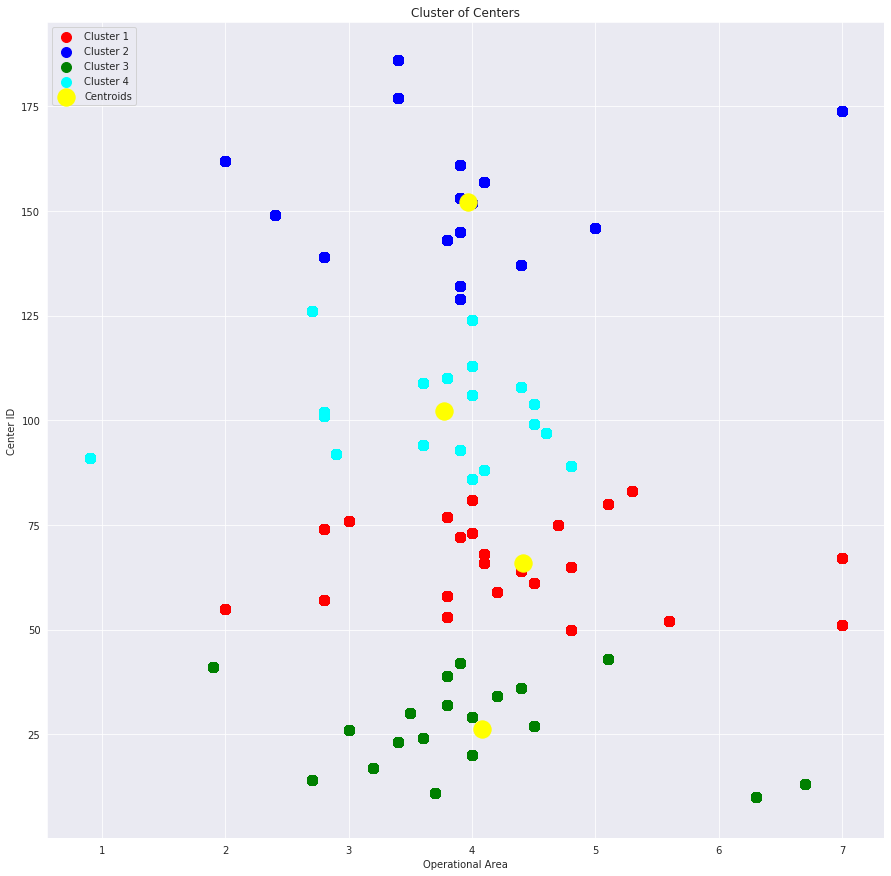

In [6]:
plt.figure(figsize=(15,15))
plt.scatter(fox[y_kmeans == 0, 0], fox[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(fox[y_kmeans == 1, 0], fox[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(fox[y_kmeans == 2, 0], fox[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(fox[y_kmeans == 3, 0], fox[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
#plt.scatter(fox[y_kmeans == 4, 0], fox[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c= 'yellow', label='Centroids')
plt.title('Cluster of Centers')
plt.xlabel('Operational Area')
plt.ylabel('Center ID')
plt.legend(loc = 'upper left')
plt.show()

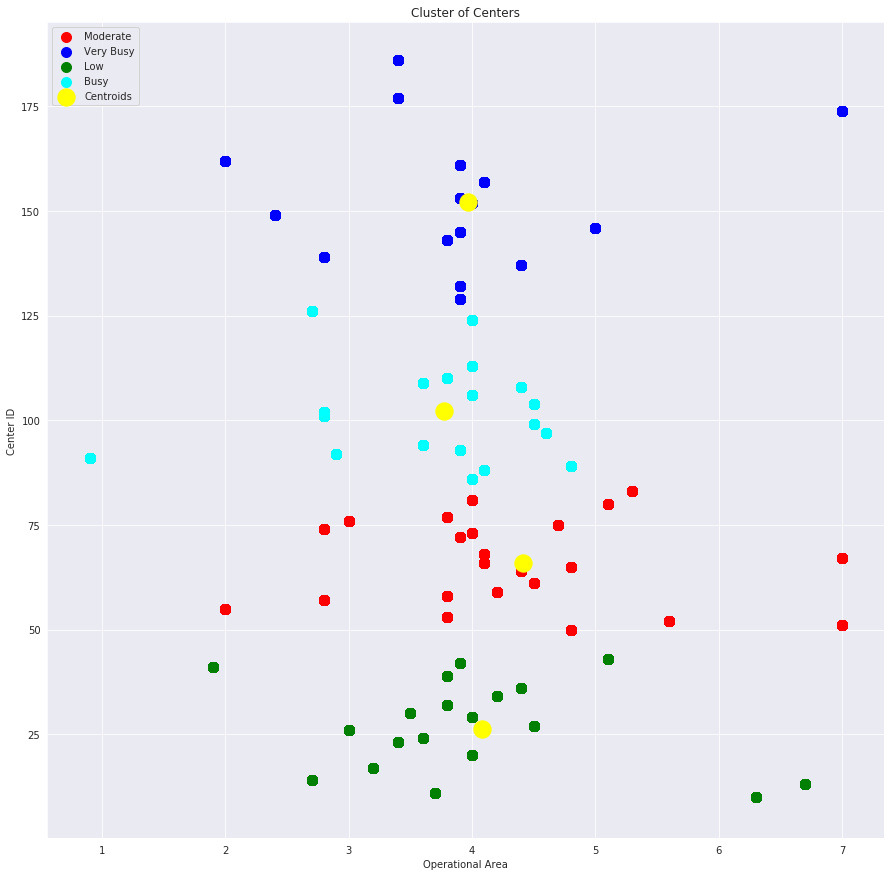

In [0]:
plt.figure(figsize=(15,15))
plt.scatter(fox[y_kmeans == 0, 0], fox[y_kmeans == 0, 1], s=100, c='red', label='Moderate')
plt.scatter(fox[y_kmeans == 1, 0], fox[y_kmeans == 1, 1], s=100, c='blue', label='Very Busy')
plt.scatter(fox[y_kmeans == 2, 0], fox[y_kmeans == 2, 1], s=100, c='green', label='Low')
plt.scatter(fox[y_kmeans == 3, 0], fox[y_kmeans == 3, 1], s=100, c='cyan', label='Busy')
#plt.scatter(fox[y_kmeans == 4, 0], fox[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c= 'yellow', label='Centroids')
plt.title('Cluster of Centers')
plt.xlabel('Operational Area')
plt.ylabel('Center ID')
plt.legend(loc = 'upper left')
plt.show()

# Clustering on No. of Orders

In [0]:
cat = mark0[['num_orders','center_id']].values

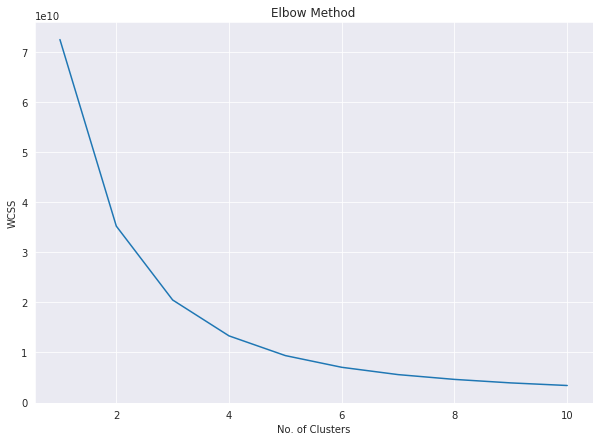

In [0]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=7)
  kmeans.fit(cat)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(cat)

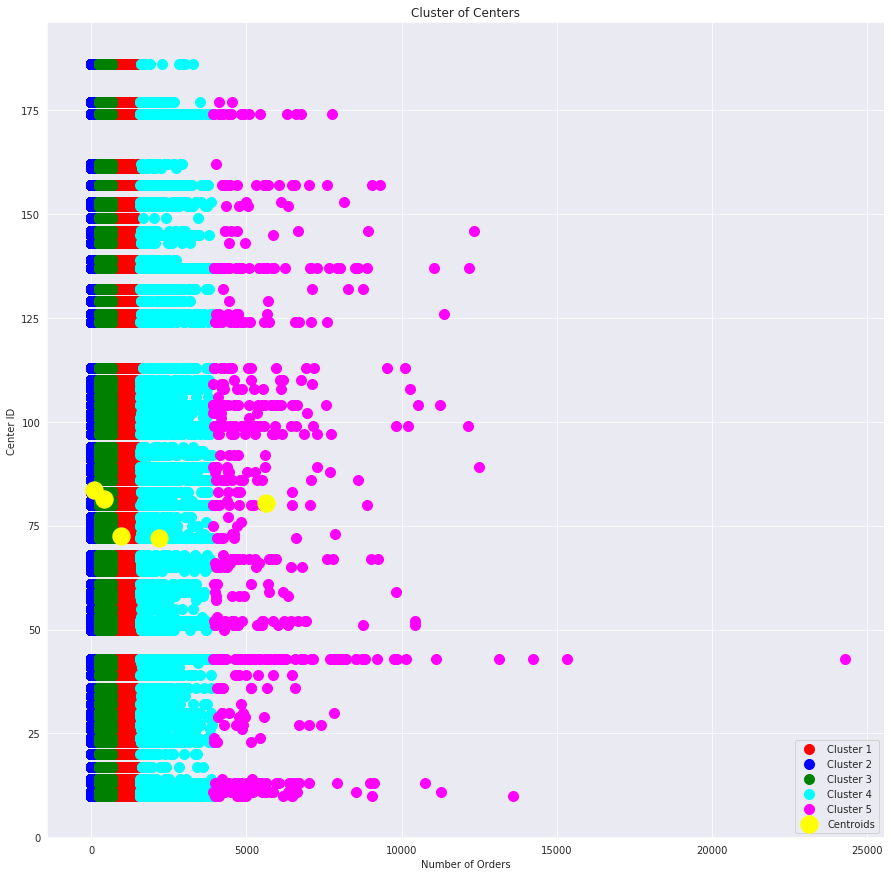

In [0]:
plt.figure(figsize=(15,15))
plt.scatter(cat[y_kmeans == 0, 0], cat[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(cat[y_kmeans == 1, 0], cat[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(cat[y_kmeans == 2, 0], cat[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(cat[y_kmeans == 3, 0], cat[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(cat[y_kmeans == 4, 0], cat[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c= 'yellow', label='Centroids')
plt.title('Cluster of Centers')
plt.xlabel('Number of Orders')
plt.ylabel('Center ID')
plt.legend(loc = 'lower right')
plt.show()